<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-to-Multiple-Linear-Regression" data-toc-modified-id="Introduction-to-Multiple-Linear-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Multiple Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Goals" data-toc-modified-id="Goals-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Goals</a></span></li><li><span><a href="#Review---Simple-Linear-Regression" data-toc-modified-id="Review---Simple-Linear-Regression-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Review - Simple Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Questions-About-the-Advertising-Data" data-toc-modified-id="Questions-About-the-Advertising-Data-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Questions About the Advertising Data</a></span></li><li><span><a href="#SciKit-Learn" data-toc-modified-id="SciKit-Learn-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>SciKit Learn</a></span></li></ul></li><li><span><a href="#Multiple-Linear-Regression" data-toc-modified-id="Multiple-Linear-Regression-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Multiple Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Statsmodels" data-toc-modified-id="Statsmodels-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Statsmodels</a></span></li><li><span><a href="#Scikit-Learn" data-toc-modified-id="Scikit-Learn-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Scikit Learn</a></span></li><li><span><a href="#Lets-talk-about-statistics" data-toc-modified-id="Lets-talk-about-statistics-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Lets talk about statistics</a></span><ul class="toc-item"><li><span><a href="#Confidence" data-toc-modified-id="Confidence-1.3.3.1"><span class="toc-item-num">1.3.3.1&nbsp;&nbsp;</span>Confidence</a></span></li><li><span><a href="#p-value" data-toc-modified-id="p-value-1.3.3.2"><span class="toc-item-num">1.3.3.2&nbsp;&nbsp;</span>p-value</a></span></li><li><span><a href="#R-squared" data-toc-modified-id="R-squared-1.3.3.3"><span class="toc-item-num">1.3.3.3&nbsp;&nbsp;</span>R-squared</a></span></li></ul></li></ul></li><li><span><a href="#Model-Validation" data-toc-modified-id="Model-Validation-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Model Validation</a></span><ul class="toc-item"><li><span><a href="#Train/Test-Split" data-toc-modified-id="Train/Test-Split-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Train/Test Split</a></span></li><li><span><a href="#K-Fold-Cross-Validation" data-toc-modified-id="K-Fold-Cross-Validation-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>K-Fold Cross Validation</a></span></li></ul></li><li><span><a href="#Categorical-Variables-and-the-Dummy-Trap" data-toc-modified-id="Categorical-Variables-and-the-Dummy-Trap-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Categorical Variables and the Dummy Trap</a></span><ul class="toc-item"><li><span><a href="#The-trap" data-toc-modified-id="The-trap-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>The trap</a></span></li></ul></li><li><span><a href="#Dealing-with-Multicollinearity" data-toc-modified-id="Dealing-with-Multicollinearity-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Dealing with Multicollinearity</a></span><ul class="toc-item"><li><span><a href="#Review" data-toc-modified-id="Review-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Review</a></span></li><li><span><a href="#Thursday" data-toc-modified-id="Thursday-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Thursday</a></span></li></ul></li><li><span><a href="#Review---Types-of-Variables" data-toc-modified-id="Review---Types-of-Variables-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Review - Types of Variables</a></span></li></ul></li></ul></div>

# Introduction to Multiple Linear Regression 

## Goals 
* Quickly review simple regression with the advertising dataset 
* Introduce Sklearn and multiple regression  
* Review hypothesis testing/confidence intervals/p-values - how do they tie into our regression results 
* Get an idea of what model validation is with regard to R-squared, underfitting and overfitting 
* Introduce train-test splits and k-fold cross validation techniques
* Learn how to deal with categorical features and multicollinearity 



## Review - Simple Linear Regression

Simple linear regression is an approach for predicting a quantitative output using a single feature (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$ + _error term_

What does each term represent?

* $y$ is the output\
* $x$ is the feature or input\
* $\beta_0$ is the y-intercept\
* $\beta_1$ is the coefficient for x\
Together, $\beta_0$ and $\beta_1$ are called the model coefficients. 

In [1]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#this allows plots to appear directly in the notebook
%matplotlib inline

#read data into a DataFrame
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


**What are the features/predictors?**

*TV:* advertising dollars spent on TV for a single product in a given market (in thousands of dollars)

*Radio:* advertising dollars spent on Radio

*Newspaper:* advertising dollars spent on Newspaper

**What is the target?**

*Sales:* sales of a single product in a given market (in thousands of widgets)

### Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:

* Is there a relationship between ads and sales?
* How strong is that relationship?
* Which ad types contribute to sales?
* What is the effect of each ad type of sales?
* Given ad spending in a particular market, can sales be predicted?

In [2]:
# print the shape of the DataFrame
data.shape

(200, 4)

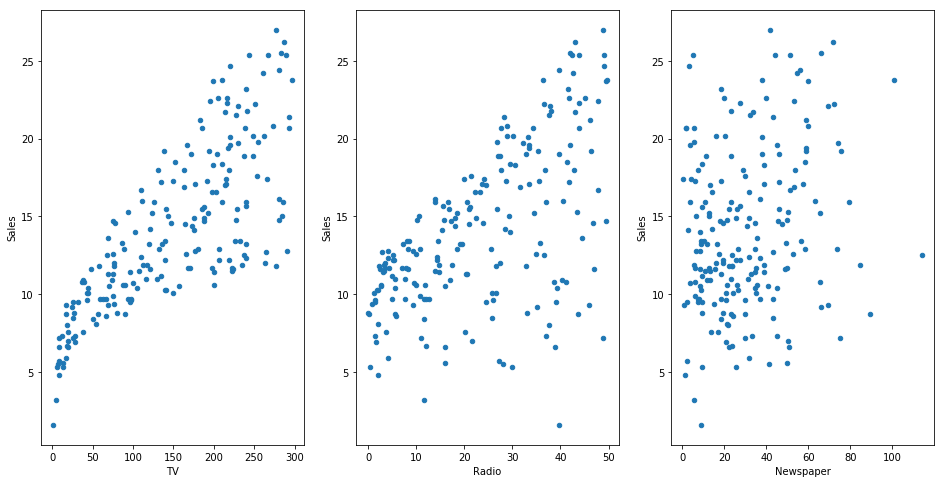

In [3]:
#There are 200 observations, and thus 200 markets in the dataset.

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3,)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
# formula: target ~ predictor 
f = 'Sales ~ TV'
model = ols(formula=f, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.47e-42
Time:                        18:27:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SciKit Learn 

In [6]:
#imports 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#create X and y 
features = ['TV']
X = data[features]
y = data.Sales

#instiatiate and fit 
slr = LinearRegression()
slr.fit(X, y)

#print coefficients 
print(slr.intercept_)
print(slr.coef_)

7.032593549127693
[0.04753664]


## Multiple Linear Regression 
We are still predicting a single variable(y) but now we are using multiple features(xs). This introduces several additional complexities but it also provides a great deal of additional flexibility and predictability.

**Examples**: 
* Your Credit score 
* What else?
* Election results 
* Test scores/ Teacher apitude 

**Modified formula**:
$$ \hat y = \hat\beta_0 + \hat\beta_1 x_1 + \hat\beta_2 x_2 +\ldots + \hat\beta_n x_n $$ 

So, $n$ is the number of predictors, $\beta_0$ is the intercept, and $\hat y$ is the so-called "fitted line" or the predicted value associated with the dependent variable.


### Statsmodels 

In [7]:
f = 'Sales ~ TV + Radio + Newspaper'
model = ols(formula=f, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.58e-96
Time:                        18:27:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Scikit Learn

In [8]:
features = ['TV', 'Radio', 'Newspaper']
X = data[features]
y = data.Sales

mlr = LinearRegression() #instantiate 
mlr.fit(X, y) #fit 

print(mlr.coef_)

[ 0.04576465  0.18853002 -0.00103749]


In [9]:
list(zip(features, mlr.coef_))

[('TV', 0.045764645455397615),
 ('Radio', 0.18853001691820456),
 ('Newspaper', -0.0010374930424763272)]

### Lets talk about statistics 

#### Confidence
A closely related concept is confidence intervals

Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows:
If the population from which this sample was drawn was sampled 100 times approximately 95 of those confidence intervals would contain the "true" coefficient

We only have a single sample of data, and not the entire population of data. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is probably within.
_Note that using 95% confidence intervals is just a convention_

You can create 90% confidence intervals (which will be more narrow)
99% confidence intervals (which will be wider) or whatever intervals you like.


#### p-value

Represents the probability that the coefficient is actually zero

**Interpreting p-values**

If the 95% confidence interval does not include _zero_ p-value will be less than 0.05 and you should reject the null 
**Question: Why not zero?**

If the 95% confidence interval includes zero p-value for that coefficient will be greater than 0.05.
Fail to reject the null.
There is no relationship

**Notes**

A p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response.
In this case, the p-value for TV is far less than 0.05.
There is a low probability that the coefficient is actually zero.
Reject null hypothesis.
There is a relationship.


TV and Radio have small p-values, whereas Newspaper has a large p-value.
Reject the null hypothesis for TV and Radio.
There is association between features and Sales.
Fail to reject the null hypothesis for Newspaper.
There is no association.

#### R-squared
To evaluate the overall fit of a linear model, we use the R-squared value

R-squared is the proportion of variance explained
It is the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model
The null model just predicts the mean of the observed response, and thus it has an intercept and no slope
R-squared is between 0 and 1
Higher values are better because it means that more variance is explained by the model.

The actual calculation of $R^2$ is:
$\Large R^2\equiv 1-\frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$.

$R^2$ is a measure of how much variation is in the dependent variable your model explains.

Adjusted $R^2$
There are some theoretical objections to using $R^2$ as an evaluator of a regression model.

One objection is that, if we add another predictor to our model, $R^2$ can only increase! (It could hardly be that with more features I'd be able to account for less of the variation in the dependent variable than I could with the smaller set of features. We saw this with adding Newspaper ads.)

One improvement is adjusted $R^2$:
$\Large R^2_{adj.}\equiv 1 - \frac{(1 - R^2)(n - 1)}{n - m - 1}$, where:

n is the number of data points; and
m is the number of predictors.
This can be a better indicator of the quality of a regression model.

R-squared will always increase as you add more features to the model, even if they are unrelated to the response
Selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

**Solution**

* Adjusted R-squared
Penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity.

**Better Solution**

* Train/test split or cross-validation
More reliable estimate.
Better for choosing which of your models will best generalize to other data.
There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models.
Cross-validation can be applied to any model, whereas the methods described above only apply to linear models. 

## Model Validation 
Our model is useless unless it generalizes well when we add new data. But how can we tell if our model is performing well? 

Your model is underfitting the training data when the model performs poorly on the testing data. This is because the model is unable to capture the relationship between the input examples (often called X) and the target values (often called Y). Your model is overfitting your training data when you see that the model performs well on the training data but does not perform well on the evaluation data. This is because the model is memorizing the data it has seen and is unable to generalize to unseen examples.

![](https://docs.aws.amazon.com/machine-learning/latest/dg/images/mlconcepts_image5.png)

**To evaluate our training and test sets, we will compare our $\hat y$ with the actual value, $y$.**
 
**Mean Squared Error (MSE)** is the mean of the squared errors:

$\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$
 
**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

$\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$

### Train/Test Split 
We need to split our data into a training and a testing set, randomly. A 70/30 split is pretty standard but what you choose can depend on the model you are using.  

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [11]:
#split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(len(X_train), len(X_test), len(y_train), len(y_test))

150 50 150 50


In [12]:
#instantiate and fit 
mlr_split = LinearRegression()

#fit
mlr_split.fit(X_train, y_train)

# calculate predictions on training and test sets
y_hat_train = mlr_split.predict(X_train)
y_hat_test = mlr_split.predict(X_test)

#compare MSE for the predicted training and test values 
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)



Train Mean Squarred Error: 3.0867913468291355
Test Mean Squarred Error: 1.9730456202283368


### K-Fold Cross Validation 
The general procedure is as follows:

1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    * Take the group as a hold out or test data set
    * Take the remaining groups as a training data set
    * Fit a model on the training set and evaluate it on the test set
    * Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

In [13]:
#imports 
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(mlr_split, X, y, cv=5, 
                               scoring='neg_mean_squared_error')

cv_results

array([-3.1365399 , -2.42566776, -1.58522508, -5.42615506, -2.79114519])

## Categorical Variables and the Dummy Trap

Up to now, all of our features have been numeric. What if one of our features was categorical?

What is a categorical feature?
**Examples**
* gender
* region/country
* marital status 
* condition of an item 

Let's create a new feature called Size(market size), and randomly assign observations to be small or large:

In [14]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'

# Series.loc is a purely label-location based indexer for selection by label
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,Radio,Newspaper,Sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data numerically

If the feature only has two categories, we can simply create a dummy variable that represents the categories as a binary value, 1 or 0

In [15]:
# Manually - create a new Series called Size_large
data['Size_large'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


In [16]:
# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper', 'Size_large']
X = data[feature_cols]
y = data.Sales

# instantiate
mlr2 = LinearRegression()
# fit
mlr2.fit(X, y)

# print coefficients
list(zip(feature_cols, mlr2.coef_))

[('TV', 0.045719820924362775),
 ('Radio', 0.1887281431342787),
 ('Newspaper', -0.0010976794483516655),
 ('Size_large', 0.05742385085482776)]

**Interpreting the Size_large coefficient**

* For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average increase in Sales of 57.42 widgets (as compared to a small market, which is called the baseline level).
* What if we had reversed the 0/1 coding and created the feature 'Size_small' instead?
* The coefficient would be the same, except it would be negative instead of positive
* As such, your choice of category for the baseline does not matter, all that changes is your interpretation of the coefficient

Let's create a new feature called Area, and randomly assign observations to be rural, suburban, or urban:

In [17]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
# Series.loc is a purely label-location based indexer for selection by label
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,Radio,Newspaper,Sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


In [18]:
# create three dummy variables using get_dummies
pd.get_dummies(data.Area).head()


,rural,suburban,urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


### The trap

Due to the nature of how dummy variables are created, one variable can be predicted from all of the others. This is known as perfect multicollinearity and it can be a problem for regression. Multicollinearity will be covered in depth later but the basic idea behind perfect multicollinearity is that you can perfectly predict what one variable will be using some combination of the other variables.

However, we actually only need two dummy variables, not three. Why? Because two dummies captures all of the "information" about the Area feature, and implicitly defines rural as the "baseline level".

Let's see what that looks like:

In [19]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area', drop_first=True)#drop first=True
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


Here is how we interpret the coding:

* rural is coded as Area_suburban=0 and Area_urban=0
* suburban is coded as Area_suburban=1 and Area_urban=0
* urban is coded as Area_suburban=0 and Area_urban=1

## Dealing with Multicollinearity
The interpretation of a regression coefficient is that it represents the average change in the dependent variable for each 1 unit change in a predictor, assuming that all the other predictor variables are kept constant. Multicollinearity occurs when 2 or more of the independent variables are higly correlated with each other.

**How do we tell if variables are correlated with each other?**
1. Look at a scatter matrix 
2. Look at a heatmap 

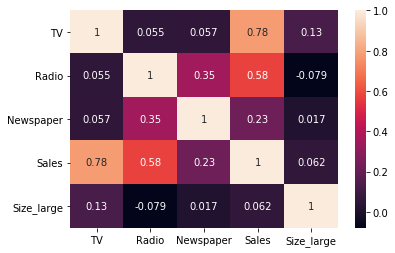

In [20]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True);

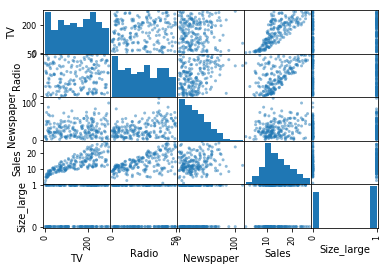

In [21]:
'''This matrix has the cool feature that it returns scatterplots
for relationships between two predictors, and histograms for a 
single feature on the diagonal.'''
pd.plotting.scatter_matrix(data);
plt.show()

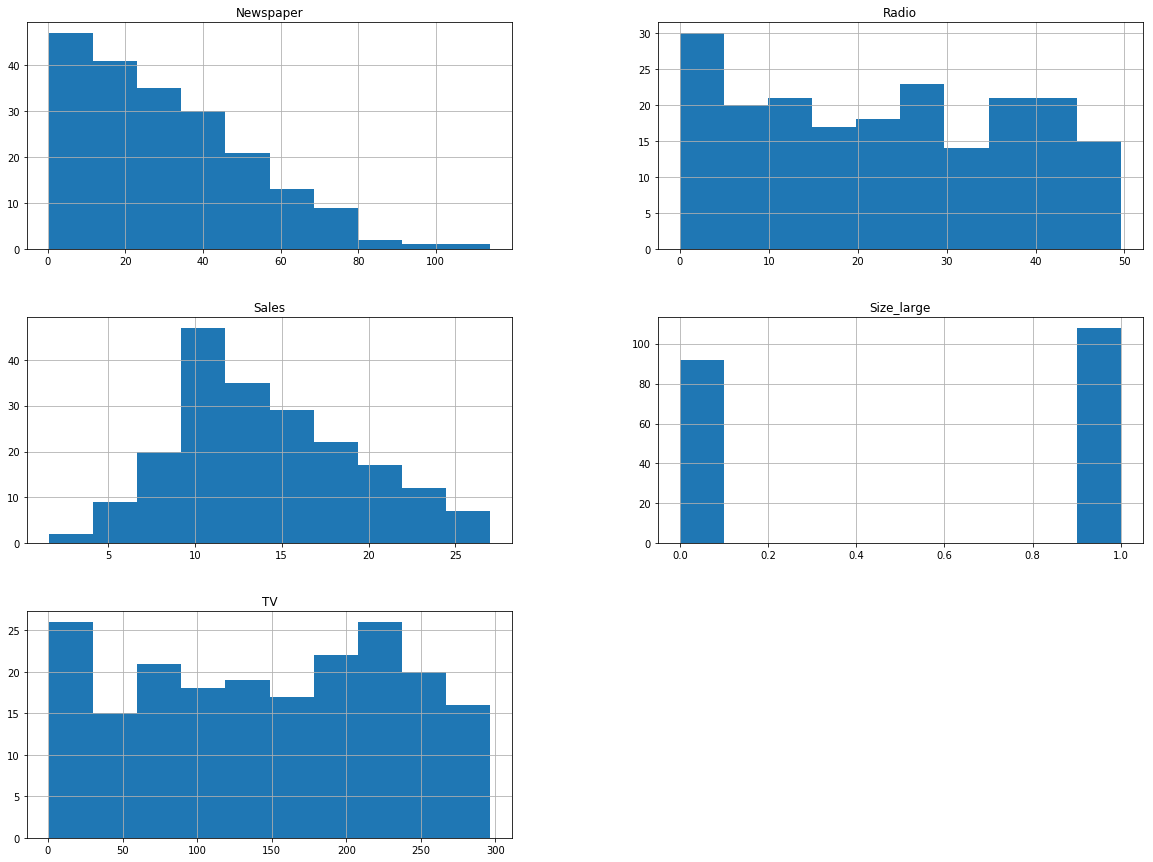

In [22]:
data.hist(figsize=(20,15));

### Review
![](https://convertwithcontent.com/wp-content/uploads/2014/04/review-the-results-of-your-a-b-split-test-300x225.jpg)

### Thursday

We will continue to build our understanding of regression by taking a look at methods to evaluate and improve upon our models such as log transforms, polynomial regression and interactions.  

## Review - Types of Variables 
[ALL THE VARIABLES](https://www.statisticshowto.com/probability-and-statistics/types-of-variables/)